In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('/content/Amazon_Reviews.csv', sep=',', engine='python') # Use the Python engine and specify the delimiter and line terminator.

In [72]:
df.head()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"


In [73]:
df.columns

Index(['Reviewer Name', 'Profile Link', 'Country', 'Review Count',
       'Review Date', 'Rating', 'Review Title', 'Review Text',
       'Date of Experience'],
      dtype='object')

In [74]:
df.describe()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
count,21214,21163,21054,21055,21055,21055,21055,21055,20947
unique,18531,21156,148,177,21054,5,19277,20407,3640
top,customer,"January 21, 2012",US,1 review,2022-10-05T12:13:39.000Z,Rated 1 out of 5 stars,Excellent,Review text not found,"January 11, 2021"
freq,72,3,9286,5761,2,13123,52,630,32


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21214 entries, 0 to 21213
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Reviewer Name       21214 non-null  object
 1   Profile Link        21163 non-null  object
 2   Country             21054 non-null  object
 3   Review Count        21055 non-null  object
 4   Review Date         21055 non-null  object
 5   Rating              21055 non-null  object
 6   Review Title        21055 non-null  object
 7   Review Text         21055 non-null  object
 8   Date of Experience  20947 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [76]:
df['Review Text'][1]

"Had multiple orders one turned up and driver had to phone as no door number on packaging, then waited all day for second package to get a message saying couldn't deliver as no number on packaging, 12 hours waiting in now don't even know when I'm getting delivery. Terrible will never use again"

In [80]:
df.isnull().sum()

,0
Reviewer Name,0
Profile Link,51
Country,160
Review Count,159
Review Date,159
Rating,159
Review Title,159
Review Text,159
Date of Experience,267


#Preprocessing

In [78]:
#Handling Missing Values
df_cleaned=df.fillna('unknown')

In [79]:
df_cleaned

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"
...,...,...,...,...,...,...,...,...,...
21209,Anders T,/users/47bd4ffe0000640001001044,DK,1 review,2009-03-22T13:14:12.000Z,Rated 5 out of 5 stars,Fast!!,"I have had perfect order fulfillment, and fast...","March 22, 2009"
21210,David E,/users/495bbbc0000064000100a972,US,2 reviews,2008-12-31T18:57:31.000Z,Rated 5 out of 5 stars,Consistently Excellent,"I have had perfect order fulfillment, and fast...","December 31, 2008"
21211,Joseph Harding,/users/48cfacbf0000640001005d04,GB,3 reviews,2008-09-16T13:05:05.000Z,Rated 3 out of 5 stars,Good prices but delivery can take time :(,I always find myself going back to amazon beco...,"September 16, 2008"
21212,Mads Dørup,/users/474aaec70000640001000a44,DK,82 reviews,2008-04-28T11:09:05.000Z,Rated 5 out of 5 stars,World-class online shopping,I have placed an abundance of orders with Amaz...,"April 28, 2008"


In [81]:
#handling review date and date of experience
df['Review Date']=pd.to_datetime(df['Review Date'])

In [82]:
df['Review Date']

,Review Date
0,2024-09-16 13:44:26+00:00
1,2024-09-16 18:26:46+00:00
2,2024-09-16 21:47:39+00:00
3,2024-09-17 07:15:49+00:00
4,2024-09-16 18:37:17+00:00
...,...
21209,2009-03-22 13:14:12+00:00
21210,2008-12-31 18:57:31+00:00
21211,2008-09-16 13:05:05+00:00
21212,2008-04-28 11:09:05+00:00


In [83]:
df['Date of Experience']=pd.to_datetime(df['Date of Experience'],format='%B %d, %Y')

In [84]:
df['Date of Experience']

,Date of Experience
0,2024-09-16
1,2024-09-16
2,2024-09-16
3,2024-09-17
4,2024-09-16
...,...
21209,2009-03-22
21210,2008-12-31
21211,2008-09-16
21212,2008-04-28


In [85]:
# Extract the rating number from text (like "Rated 1 out of 5 stars")
df['Rating'] = df['Rating'].str.extract('(\d)').astype(float)

In [86]:
# Handle NaN values before converting to integer
df['Rating'] = df['Rating'].fillna(0).astype(int)

In [87]:
print(df['Rating'].head())

0    1
1    1
2    1
3    1
4    1
Name: Rating, dtype: int64


#Understanding data through plots/Graph

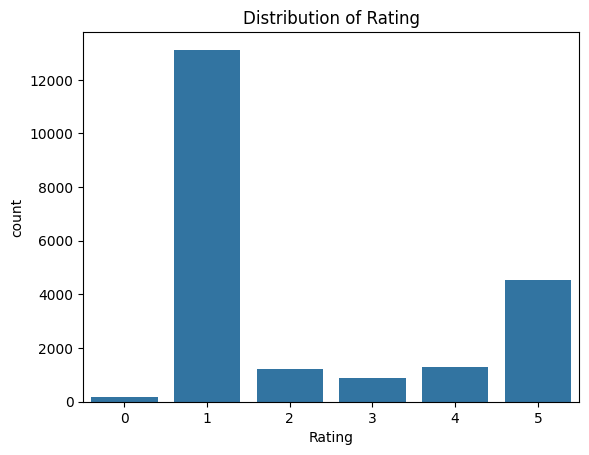

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Rating',data=df)
plt.title('Distribution of Rating')
plt.show()

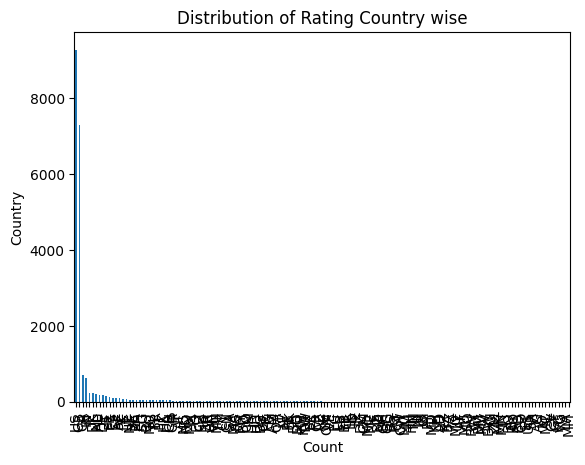

In [89]:
#country wise count plot
df['Country'].value_counts().plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Distribution of Rating Country wise')
plt.show()

In [90]:
df_cleaned = df.fillna('unknown')

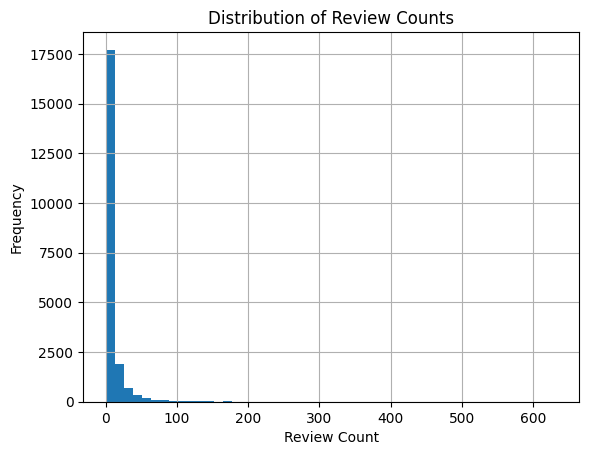

In [91]:
# Review Count Distribution
df_cleaned['Review Count'] = df_cleaned['Review Count'].str.extract('(\d+)').fillna(0).astype(int)  # Convert Review Count to numeric
df_cleaned['Review Count'].hist(bins=50)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

In [92]:
# Step 1: Add word count (Review Length) for each review
# Handle missing or invalid review texts
df['Review Length'] = df['Review Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

In [93]:
# Step 2: Descriptive stats for review length
print(df['Review Length'].describe())

count    21214.000000
mean        83.200481
std         93.986491
min          0.000000
25%         26.000000
50%         56.000000
75%        106.000000
max       1783.000000
Name: Review Length, dtype: float64


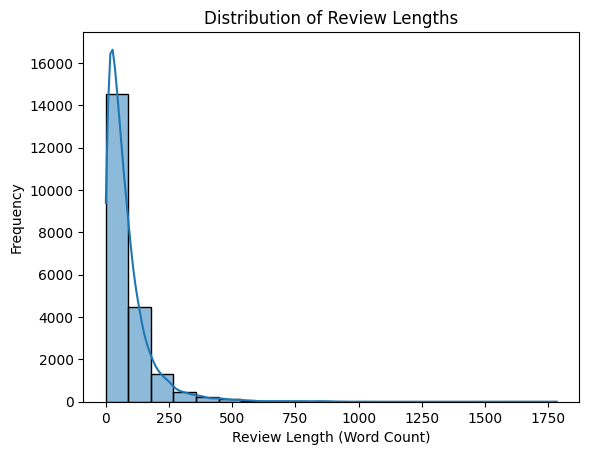

In [94]:
# Step 3: Plot the review length distribution
sns.histplot(df['Review Length'], bins=20, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

In [95]:
# Convert 'Review Date' to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'])

In [96]:
# Reviews over time
reviews_over_time = df.groupby(df['Review Date'].dt.to_period('M')).size()
print(reviews_over_time)

Review Date
2007-08      1
2008-04      1
2008-09      1
2008-12      1
2009-03      1
          ... 
2024-05    307
2024-06    349
2024-07    399
2024-08    375
2024-09    242
Freq: M, Length: 184, dtype: int64


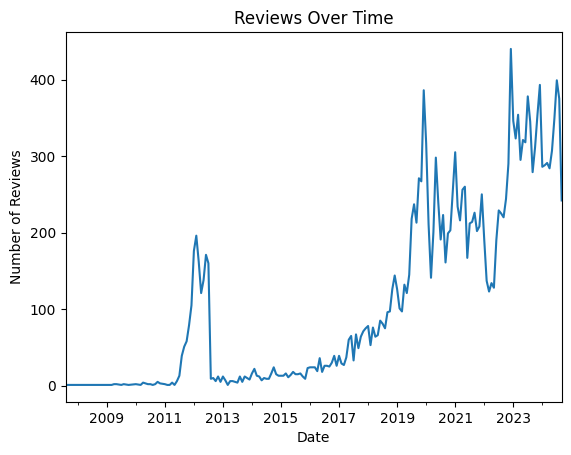

In [97]:
# Plotting
reviews_over_time.plot(kind='line')
plt.title('Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

In [98]:
# Step 1: Check for missing values in the 'Country' column
missing_countries = df['Country'].isnull().sum()
print(f"Missing values in 'Country': {missing_countries}")

Missing values in 'Country': 160


In [99]:
# Step 2: Number of unique countries
unique_countries = df['Country'].nunique()
print(f"Number of unique countries: {unique_countries}")

Number of unique countries: 148


In [100]:
# Step 3: Most frequent countries (Top 10)
top_countries = df['Country'].value_counts().head(10)
print("Top 10 countries by review count:\n", top_countries)


Top 10 countries by review count:
 Country
US    9286
GB    7294
CA     708
IN     629
IE     242
DK     239
NL     215
AU     186
DE     181
IT     150
Name: count, dtype: int64


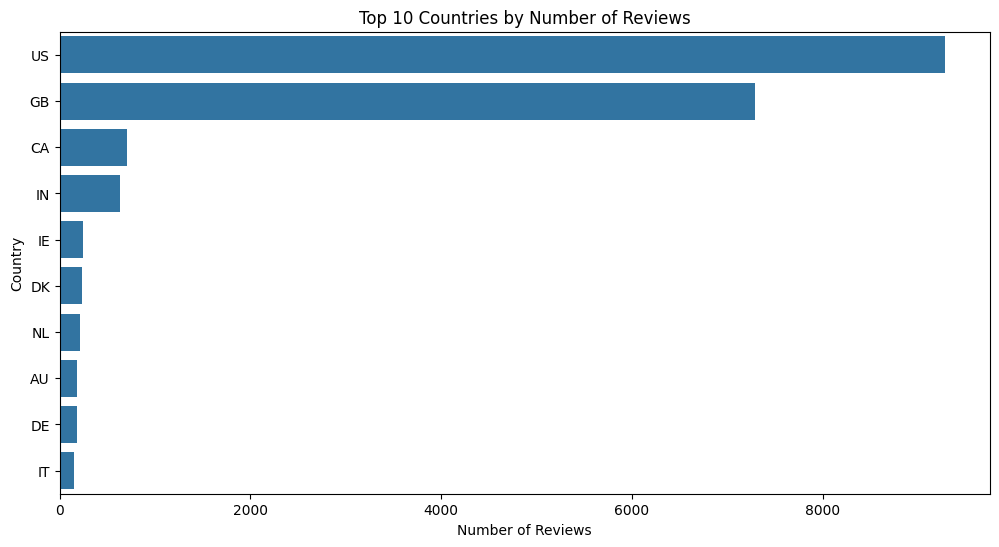

In [101]:
# Step 4: Visualize the distribution of reviews by country
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().iloc[:10].index)
plt.title('Top 10 Countries by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()

In [102]:
# Step 5: Percentage of reviews by country (Top 10)
country_percentage = (df['Country'].value_counts(normalize=True) * 100).head(10)
print("Top 10 countries by percentage of total reviews:\n", country_percentage)

Top 10 countries by percentage of total reviews:
 Country
US    44.105633
GB    34.644248
CA     3.362781
IN     2.987556
IE     1.149425
DK     1.135176
NL     1.021184
AU     0.883443
DE     0.859694
IT     0.712454
Name: proportion, dtype: float64


In [103]:
# Step 6: Handle missing values by replacing with 'Unknown'
df['Country'] = df['Country'].fillna('Unknown')

#Tf-IDF Vectorizer using NLP Method


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
tfidf = TfidfVectorizer(max_features=5000)

In [106]:
X_tfidf = tfidf.fit_transform(df['Review Text'].fillna(''))

In [107]:
# Check for missing values in 'Review Text'
print(df['Review Text'].isnull().sum())

159


In [108]:
print(df['Review Text'].str.len().value_counts())

Review Text
21.0      645
69.0       55
105.0      55
68.0       54
46.0       52
         ... 
1902.0      1
1480.0      1
1587.0      1
1867.0      1
1352.0      1
Name: count, Length: 2126, dtype: int64


In [109]:
# Fill None or NaN values with an empty string
df['Review Text'] = df['Review Text'].fillna('')

#Sentiment Analysis Using TextBlob

In [110]:
from textblob import TextBlob

def get_sentiment(review):
    if review:
        analysis = TextBlob(review)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'neutral'

In [111]:
# Apply the function to create the Sentiment column
df['Sentiment'] = df['Review Text'].apply(get_sentiment)

In [112]:
print(df[['Review Text', 'Sentiment']].head())

                                         Review Text Sentiment
0  I registered on the website, tried to order a ...  negative
1  Had multiple orders one turned up and driver h...  negative
2  I informed these reprobates that I WOULD NOT B...  negative
3  I have bought from Amazon before and no proble...  negative
4  If I could give a lower rate I would! I cancel...   neutral


#Logistic Regression Model for Sentiment Classification

In [113]:
# Step 1: TF-IDF Vectorization of 'Review Text' column
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Review Text'])

In [114]:
from sklearn.model_selection import train_test_split # imports the function

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Sentiment'], test_size=0.2, random_state=42)

In [115]:
# Step 3: Logistic Regression Model
from sklearn.linear_model import LogisticRegression # imports the LogisticRegression class

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [116]:
# Step 4: Model accuracy
from sklearn.metrics import accuracy_score # imports the function

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8274805562102286


In [117]:
# Step 5: Classification Report for detailed metrics
from sklearn.metrics import classification_report # imports the function

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))


Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.84      0.82      1688
     neutral       0.90      0.55      0.68       460
    positive       0.85      0.88      0.86      2095

    accuracy                           0.83      4243
   macro avg       0.85      0.76      0.79      4243
weighted avg       0.83      0.83      0.82      4243



In [118]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
# Fit the model using scaled features
model = LogisticRegression(max_iter=500)  # Adjust as needed
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [120]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [121]:
y_pred = model.predict(X_test_scaled)

In [122]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')

In [123]:
# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.7096
Precision: 0.7093
Recall: 0.7096


In [124]:
# Display full classification report for more metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Rating 1', 'Rating 2', 'Rating 3']))


Classification Report:
              precision    recall  f1-score   support

    Rating 1       0.68      0.69      0.69      1688
    Rating 2       0.68      0.58      0.62       460
    Rating 3       0.74      0.75      0.75      2095

    accuracy                           0.71      4243
   macro avg       0.70      0.67      0.69      4243
weighted avg       0.71      0.71      0.71      4243



#SVM Classifier Model for Sentiment Classification

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [126]:
# Step 1: TF-IDF Vectorization of 'Review Text' column
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Review Text'])

In [127]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Sentiment'], test_size=0.2, random_state=42)

In [128]:
# Step 3: SVC Model (SVM)
svc_model = SVC(kernel='linear', C=1.0, random_state=42)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [129]:
# Step 4: Model accuracy
y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy:", accuracy)

SVM Model Accuracy: 0.8321942022154136


In [130]:
# Step 5: Classification Report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))


Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.84      0.82      1688
     neutral       0.85      0.64      0.73       460
    positive       0.86      0.87      0.86      2095

    accuracy                           0.83      4243
   macro avg       0.83      0.78      0.80      4243
weighted avg       0.83      0.83      0.83      4243

